In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import warnings
print("All Library's are important")

All Library's are important


## Arun is interested in losing weight through exercise. He is comparing two workout plans, A and B, to decide which one to follow.

# Workout plan A

In [129]:
Workout_Plan_A = {'Person': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 
               'Frank', 'Grace', 'Hannah', 'Ian', 'Jack'],
        'Total Weight Loss (kg)': [3.0, 30.5, 0.5, 2.3, 1.0, 
                                2.2, 3.0, 1.0, 1.0, 2.0]}

# Extracting total weight loss values
Workout_Plan_A_values = Workout_Plan_A['Total Weight Loss (kg)']

# Calculating mean 
Workout_Plan_A_Mean = np.mean(Workout_Plan_A_values)
print("Average Weigtloss for Workout Plan A is :", np.round((Workout_Plan_A_Mean),2))


Average Weigtloss for Workout Plan A is : 4.65


# Workout plan B

In [130]:
Workout_Plan_B = {'Person': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 
               'Frank', 'Grace', 'Hannah', 'Ian', 'Jack'],
        'Total Weight Loss (kg)': [3.8,3.4, 2.5, 2.3, 2.0, 
                                2.2, 3.0, 4.1, 4.0, 4.3]}

# Extracting total weight loss values
Workout_Plan_B_values = Workout_Plan_B['Total Weight Loss (kg)']

# Calculating mean and median
Workout_Plan_B_Mean = np.mean(Workout_Plan_B_values)

print("Average Weigtloss for Workout B is :", np.round((Workout_Plan_B_Mean),2))

Average Weigtloss for Workout B is : 3.16


##  Plan A has an average weight loss of 4.65 kg, while plan B has an average weight loss of 3.16 kg. Based on this information, Arun decides to go with workout plan A because it has a higher average weight loss. To determine if Arun made the right decision, we need to conduct a more comprehensive analysis to ascertain which plan is truly effective?

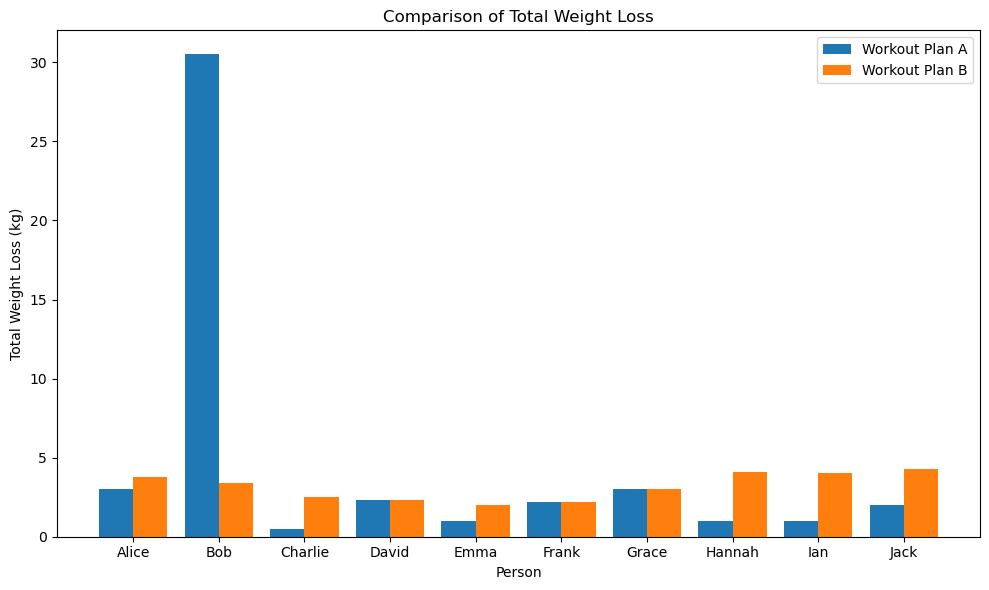

In [131]:
import numpy as np
import matplotlib.pyplot as plt

# Data for Workout Plan A
Workout_Plan_A = {'Person': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 
               'Frank', 'Grace', 'Hannah', 'Ian', 'Jack'],
        'Total Weight Loss (kg)': [3.0, 30.5, 0.5, 2.3, 1.0, 
                                2.2, 3.0, 1.0, 1.0, 2.0]}

# Data for Workout Plan B
Workout_Plan_B = {'Person': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 
               'Frank', 'Grace', 'Hannah', 'Ian', 'Jack'],
        'Total Weight Loss (kg)': [3.8, 3.4, 2.5, 2.3, 2.0, 
                                2.2, 3.0, 4.1, 4.0, 4.3]}

# Extracting total weight loss values for both plans
Workout_Plan_A_values = Workout_Plan_A['Total Weight Loss (kg)']
Workout_Plan_B_values = Workout_Plan_B['Total Weight Loss (kg)']

# Generating x-axis values (person index)
persons = np.arange(len(Workout_Plan_A['Person']))

# Plotting the data
plt.figure(figsize=(10, 6))

# For Workout Plan A
plt.bar(persons - 0.2, Workout_Plan_A_values, width=0.4, label='Workout Plan A')

# For Workout Plan B
plt.bar(persons + 0.2, Workout_Plan_B_values, width=0.4, label='Workout Plan B')

# Adding labels and title
plt.xlabel('Person')
plt.ylabel('Total Weight Loss (kg)')
plt.title('Comparison of Total Weight Loss')
plt.xticks(persons, Workout_Plan_A['Person'])
plt.legend()

# Displaying the plot

plt.tight_layout()
plt.show()


##  This visualization allows for a quick comparison of the total weight loss achieved by participants following Workout Plan A and Workout Plan B, providing insights into the effectiveness of each plan

## Interpretation:
### Bob's weight loss data stands out significantly from the rest of the dataset, indicating that it may be an outlier. Outliers, such as Bob's data point, have the potential to distort the outcomes of our analysis, which could result in misleading conclusions. Therefore, it's imperative to take measures to address these outliers to uphold the accuracy and integrity of our findings. By identifying and correcting outliers, such as Bob's anomalous weight loss, we strive to enhance the precision and reliability of our analysis. This ensures that our conclusions are based on a more representative and trustworthy dataset, ultimately leading to more robust insights and informed decision-making.

#  Outlier treatment

# Method 1: Interquartile Range (IQR) Method
## Output Description:
-  Calculates the Interquartile Range (IQR) of the total weight loss data.
- Defines lower and upper bounds based on the IQR.
- Identifies outliers falling outside these bounds.
- Removes outliers from the dataset.
- Computes the corrected mean of the cleaned dataset.

In [132]:
# Step 1: Calculate the IQR
Q1 = np.percentile(weight_loss_values, 25)
Q3 = np.percentile(weight_loss_values, 75)
IQR = Q3 - Q1
# Step 2: Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Step 3: Identify and remove outliers
outliers_removed = weight_loss_values[(weight_loss_values >= lower_bound) & (weight_loss_values <= upper_bound)]
# Calculate the corrected mean after removing outliers
corrected_mean_iqr = np.mean(outliers_removed)
print("Method 1: Outlier Reduction using IQR Method")
print("Corrected Mean after Outlier Removal (IQR Method):", np.round((corrected_mean_iqr),2))

Method 1: Outlier Reduction using IQR Method
Corrected Mean after Outlier Removal (IQR Method): 1.78


## Method 2: Imputing Median Method
### Output Description:
- Calculates the median of the total weight loss data.
- Replaces outliers falling outside the IQR bounds with the median value.
- Computes the corrected mean of the dataset with replaced outliers.

In [133]:
# Step 1: Calculate the median of the dataset
median = np.median(weight_loss_values)

# Step 2: Replace outliers with the median value
imputed_values = np.where((weight_loss_values < np.percentile(weight_loss_values, 25)) | 
                          (weight_loss_values > np.percentile(weight_loss_values, 75)),
                          median, weight_loss_values)

# Calculate the corrected mean after imputing median value for outliers
corrected_mean_imputation = np.mean(imputed_values)
print("Method 2: Outlier Reduction using Imputing Median Value")
print("Corrected Mean after Imputing Median Value for Outliers:", np.round((corrected_mean_imputation),2))

Method 2: Outlier Reduction using Imputing Median Value
Corrected Mean after Imputing Median Value for Outliers: 1.79


In [134]:
print("Average Weigtloss for Workout Plan A before outlier treatment is :", np.round((Workout_Plan_A_Mean),2))
print("Corrected Mean after Outlier Removal (IQR Method):", np.round((corrected_mean_iqr),2))
print("Corrected Mean after Imputing Median Value for Outliers:", np.round((corrected_mean_imputation),2))
print("Average Weigtloss for Workout B is :", np.round((Workout_Plan_B_Mean),2))

Average Weigtloss for Workout Plan A before outlier treatment is : 4.65
Corrected Mean after Outlier Removal (IQR Method): 1.78
Corrected Mean after Imputing Median Value for Outliers: 1.79
Average Weigtloss for Workout B is : 3.16


## Conclusion: 
- After addressing outliers, we proceed to compare the accurate mean values for Workout Plan A and Workout Plan B. Arun opted for Workout Plan A, unaware of its lower efficiency, without delving into further analysis. It's evident that Workout Plan B yields more efficient weight loss results. This instance underscores the significant impact outliers have on model accuracy. Therefore, it's imperative to effectively handle outliers before making predictions.

# Thank You